# Project-Market sales

In [38]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#import dataset
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Part 1 EDA

### 1. Description analysis


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
train.shape

(8523, 12)

In [41]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
#check missing value
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#the item weight of same item should be same
#the outlet_size may correlated with the outlet_type

In [43]:
#check missing value precentage
percentage = 100 * train.isnull().sum() / len(train)
percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [44]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#the lowest value in item_visibility is 0. It doesn't make sense if a product sale in market without any place to show it to the customer. So I guess the 0 is the missing value

In [45]:
#count catergories for varibales
cat=[x for x in train.dtypes.index if train.dtypes[x]=='object']
cat=[x for x in cat if x not in ['Item_Identifier','Outlet_Identifier']]
for col in cat:
    print('\n {} frequency'.format(col))
    print(train[col].value_counts())


 Item_Fat_Content frequency
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 Item_Type frequency
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 Outlet_Size frequency
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 Outlet_Location_Type frequency
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 Outlet_Type frequency
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935


### 2. Characteristics modify

In [46]:
#exchange the name of same Item_Fat_Content
train.replace('LF','Low Fat',inplace=True)
train.replace('low fat','Low Fat',inplace=True)
train.replace('Low fat','Low Fat',inplace=True)
train.replace('reg','Regular',inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [47]:
#exchange 0 to NA of Item_Visibility
train.loc[train['Item_Visibility']==0,'Item_Visibility']=np.nan
train['Item_Visibility'].isnull().sum()

526

In [48]:
#transfer the year to the length of time
train['Outlet_Year']=2013-train['Outlet_Establishment_Year']
train['Outlet_Year'].value_counts()

28    1463
26     932
16     930
9      930
14     930
11     929
4      928
6      926
15     555
Name: Outlet_Year, dtype: int64

In [49]:
#add a new columns to represent the item_type from Item_Identifier
train['Item_catergories']=train['Item_Identifier'].apply(lambda x:x[0:2])
train['Item_catergories']=train['Item_catergories'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})
train['Item_catergories'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_catergories, dtype: int64

### 3. refill the missing value

In [50]:
#item_weight
# use mean of the item_weight groupby item_identifier
item_avg_weight=train.groupby('Item_Identifier')['Item_Weight'].mean()
train['Item_Weight'].fillna(0,inplace=True)
for index,row in train.iterrows():
    if (row['Item_Weight']) == 0:
        train.loc[index,'Item_Weight']=item_avg_weight[row['Item_Identifier']]
train['Item_Weight'].isnull().sum()
#train['Item_Weight'].value_counts()

4

In [51]:
#outlet_size
train.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1458
Tier 2                Small           930
Tier 3                High            932
                      Medium         1863
Name: Outlet_Size, dtype: int64

In [52]:
train.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [53]:
#using outlet type and Outlet_Location_Type to fill missing value in outlet size
train.loc[(train['Outlet_Location_Type']=='Tier 2')&(train['Outlet_Size'].isnull()),'Outlet_Size']='Small'
train.loc[(train['Outlet_Type']=='Grocery Store')&(train['Outlet_Size'].isnull()),'Outlet_Size']='Small'
train.loc[(train['Outlet_Type']=='Supermarket Type2')&(train['Outlet_Size'].isnull()),'Outlet_Size']='Medium'
train.loc[(train['Outlet_Type']=='Supermarket Type3')&(train['Outlet_Size'].isnull()),'Outlet_Size']='Medium'
train['Outlet_Size'].isnull().sum()
train['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [54]:
#Item_Visibility 
#using outlet_type
train.groupby(['Outlet_Type'])['Item_Visibility'].mean()
train.loc[(train['Outlet_Type']=='Grocery Store')&(train['Item_Visibility'].isnull()),'Item_Visibility']=0.110904
train.loc[(train['Outlet_Type']=='Supermarket Type1')&(train['Item_Visibility'].isnull()),'Item_Visibility']=0.064690
train.loc[(train['Outlet_Type']=='Supermarket Type2')&(train['Item_Visibility'].isnull()),'Item_Visibility']=0.065610
train.loc[(train['Outlet_Type']=='Supermarket Type3')&(train['Item_Visibility'].isnull()),'Item_Visibility']=0.062634
train['Item_Visibility'].isnull().sum()
#train['Item_Visibility'].value_counts()

0

### 4.visulization of the trend of each column

Text(0.5, 1.0, 'The total of Item_Outlet_Sales in each Outlet_Identifier')

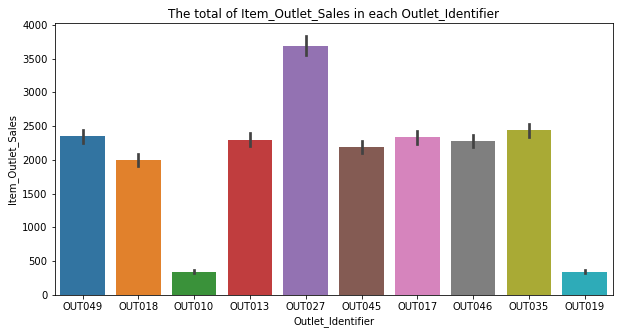

In [55]:
#understanding outlet_identifier depending on item_outlet_sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = "Outlet_Identifier", y= "Item_Outlet_Sales")
plt.title('The total of Item_Outlet_Sales in each Outlet_Identifier')

Text(0.5, 1.0, 'The mean of item outlet sales during 1985 to 2009')

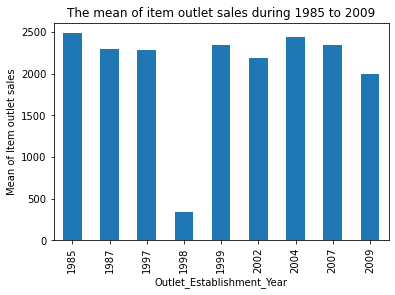

In [56]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")
plt.title('The mean of item outlet sales during 1985 to 2009')

Text(0.5, 1.0, 'The mean of item outlet sales in different outlet_type')

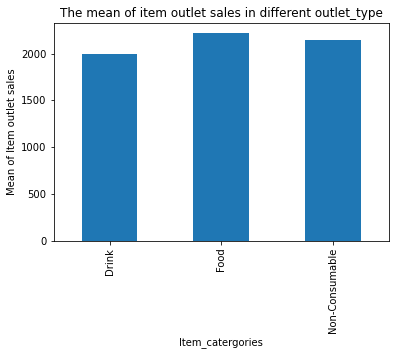

In [57]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
train.groupby("Item_catergories")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")
plt.title('The mean of item outlet sales in different outlet_type')

Text(0.5, 1.0, 'The mean of item outlet sales in different outlet_type')

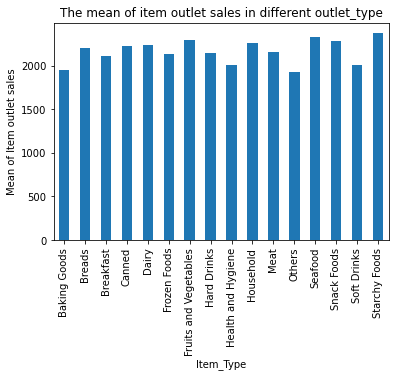

In [58]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
train.groupby("Item_Type")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")
plt.title('The mean of item outlet sales in different outlet_type')

Text(0.5, 1.0, 'The mean of item outlet sales in different outlet_type')

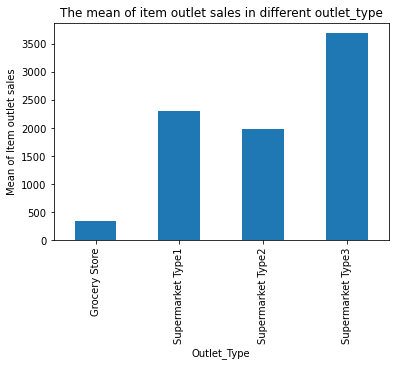

In [59]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")
plt.title('The mean of item outlet sales in different outlet_type')

### 5. Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count

In [60]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_catergories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food


In [61]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Year', 'Item_catergories'],
      dtype='object')

In [62]:
cols = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Item_catergories']

In [63]:
#label encoding-transfer every categories to number label
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = train[i].value_counts().to_dict()
    train[i] = train[i].map(x)

In [64]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_catergories
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380,14,6125
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228,4,799
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700,14,6125
3,6,19.20,3006,0.110904,1232,182.0950,555,555,4798,3350,1083,732.3800,15,6125
4,6,8.93,5517,0.064690,910,53.8614,932,932,932,3350,5577,994.7052,26,1599


<AxesSubplot:>

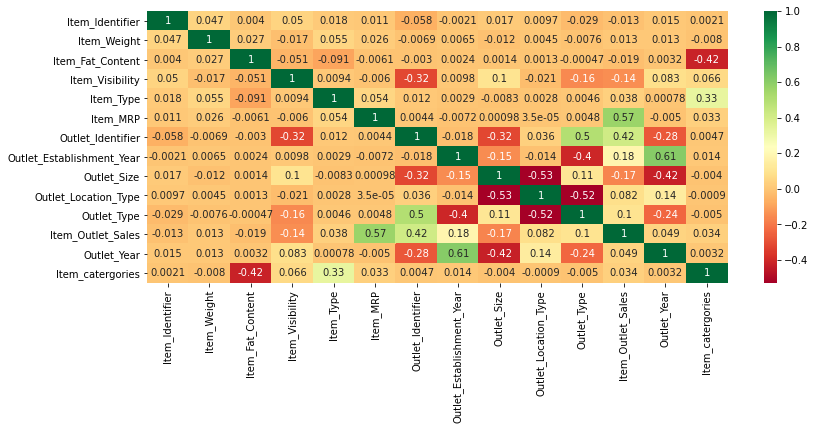

In [65]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (13,5))
sns.heatmap(train.corr(), cmap = "RdYlGn", annot = True)

In [66]:
new_data = train.copy()

In [67]:
# charaterisitc selection - remocing less correlated columns #
new_data = new_data.drop(['Item_Identifier', 'Item_Weight','Item_Type'], axis = 1)

In [68]:
#Lowering the down column names
new_data.columns = new_data.columns.str.lower()

In [69]:
new_data.head()

,item_fat_content,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlet_year,item_catergories
0,5517,0.016047,249.8092,930,930,2793,2388,5577,3735.1380,14,6125
1,3006,0.019278,48.2692,928,928,2793,3350,928,443.4228,4,799
2,5517,0.016760,141.6180,930,930,2793,2388,5577,2097.2700,14,6125
3,3006,0.110904,182.0950,555,555,4798,3350,1083,732.3800,15,6125
4,5517,0.064690,53.8614,932,932,932,3350,5577,994.7052,26,1599


In [70]:
new_data.columns

Index(['item_fat_content', 'item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'outlet_year', 'item_catergories'],
      dtype='object')

In [71]:
new_data.skew()

item_fat_content            -0.616705
item_visibility              1.267269
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_location_type        -0.005177
outlet_type                 -0.650418
item_outlet_sales            1.177531
outlet_year                  0.396641
item_catergories            -1.002055
dtype: float64

### 6. Visualizing the skewness of the dataset

#KDE（Kernel density estimation）是核密度估计的意思，它用来估计随机变量的概率密度函数，可以将数据变得更平缓。plot.kde() 创建一个核密度的绘图，plot.kde() 对于 Series和DataFrame数据结构都适用
* item visibility 和item_outlet_sales 存在着偏态

<AxesSubplot:xlabel='item_catergories', ylabel='Density'>

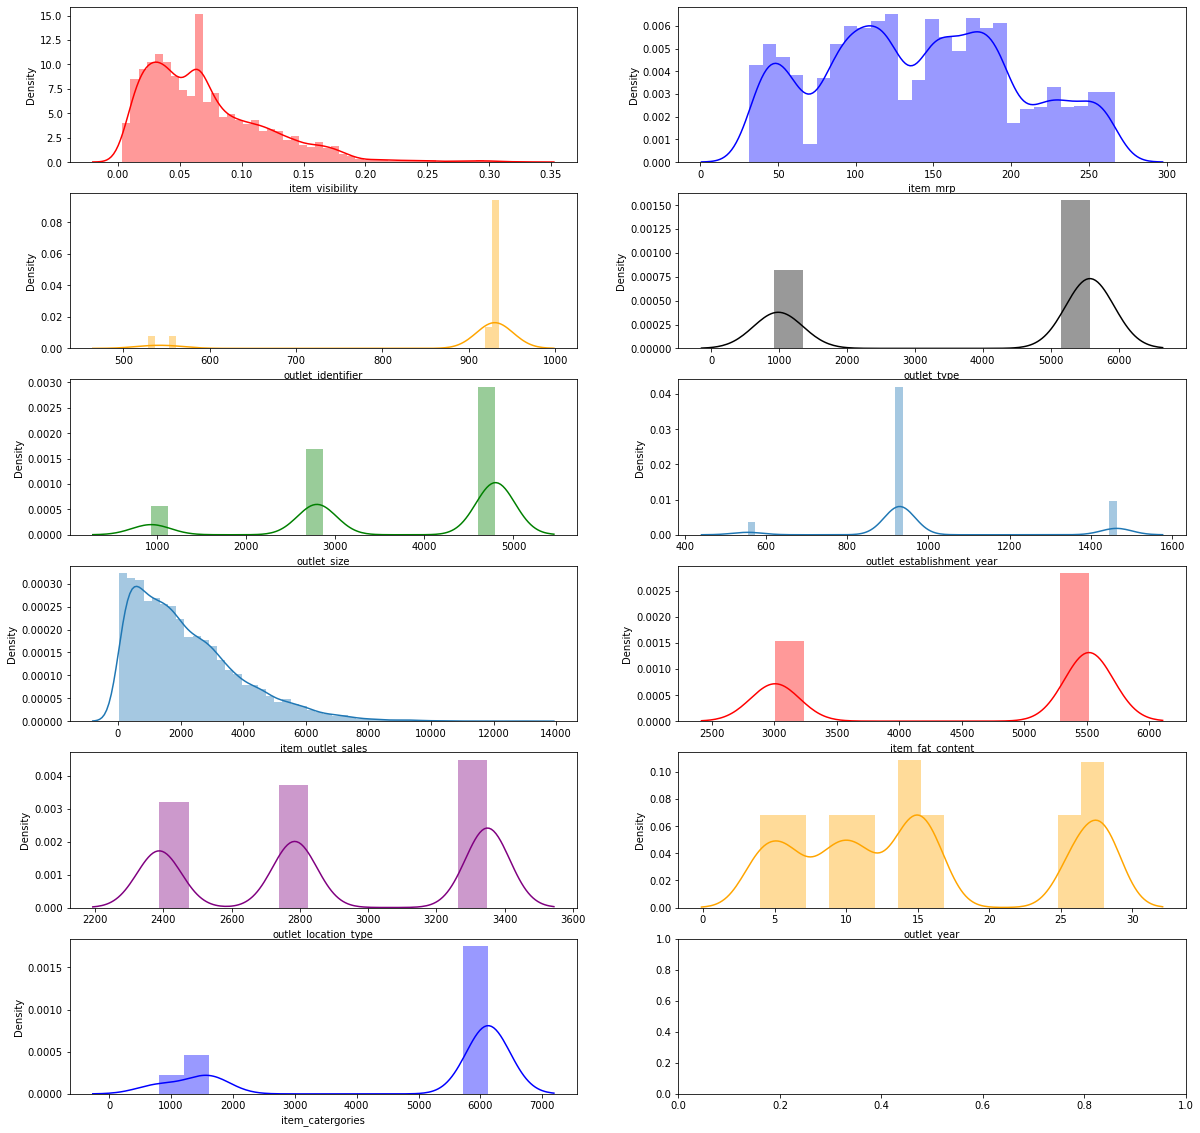

In [72]:
fig, ax = plt.subplots(6,2,figsize = (20,20))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "green")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[2,1])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_fat_content"], kde =True, ax=ax[3,1], color = "red")
sns.distplot(new_data["outlet_location_type"], kde =True, ax=ax[4,0], color = "purple")
sns.distplot(new_data["outlet_year"], kde =True, ax=ax[4,1], color = "orange")
sns.distplot(new_data["item_catergories"], kde =True, ax=ax[5,0], color = "blue")

### 7. Normalizaing- From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness.
为了令两个特征分布更偏向于正态分布，使用对数转换

In [73]:
# Using log to normalize
for i in new_data.columns:
    new_data[i] = np.log(new_data[i])

In [74]:
new_data.head()

,item_fat_content,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,outlet_year,item_catergories
0,8.615590,-4.132215,5.520697,6.835185,6.835185,7.934872,7.778211,8.626406,8.225540,2.639057,8.720134
1,8.008366,-3.948780,3.876794,6.833032,6.833032,7.934872,8.116716,6.833032,6.094524,1.386294,6.683361
2,8.615590,-4.088756,4.953133,6.835185,6.835185,7.934872,7.778211,8.626406,7.648392,2.639057,8.720134
3,8.008366,-2.199090,5.204529,6.318968,6.318968,8.475954,8.116716,6.987490,6.596300,2.708050,8.720134
4,8.615590,-2.738149,3.986414,6.837333,6.837333,6.837333,8.116716,8.626406,6.902446,3.258097,7.377134


<AxesSubplot:xlabel='item_catergories', ylabel='Density'>

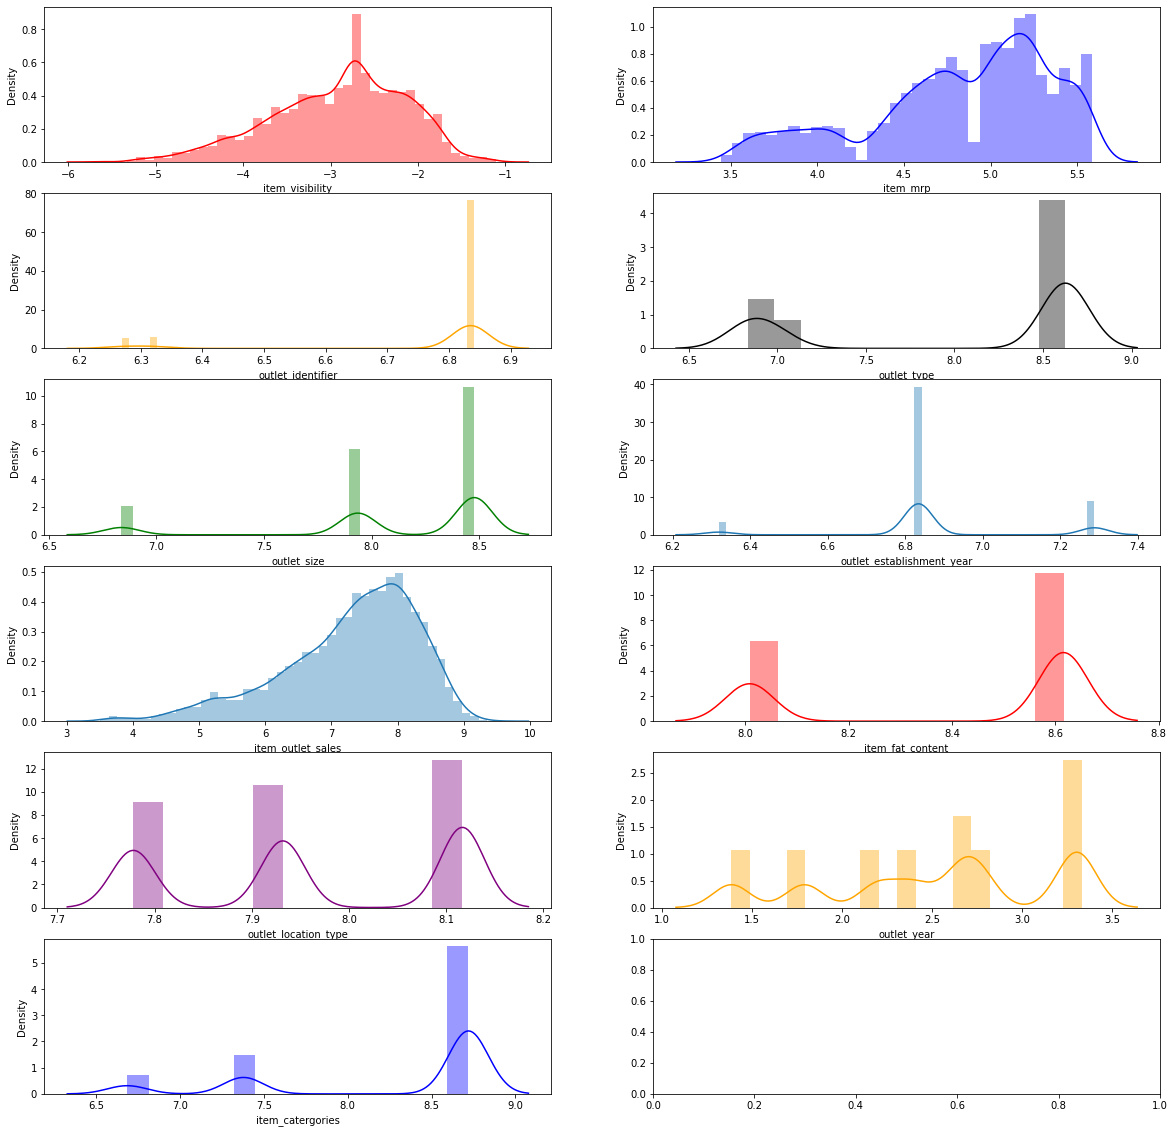

In [75]:
# After Transformation
fig, ax = plt.subplots(6,2,figsize = (20,20))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "green")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[2,1])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_fat_content"], kde =True, ax=ax[3,1], color = "red")
sns.distplot(new_data["outlet_location_type"], kde =True, ax=ax[4,0], color = "purple")
sns.distplot(new_data["outlet_year"], kde =True, ax=ax[4,1], color = "orange")
sns.distplot(new_data["item_catergories"], kde =True, ax=ax[5,0], color = "blue")

In [81]:
new_data.skew()

item_fat_content            -0.616705
item_visibility             -0.485189
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_location_type        -0.099774
outlet_type                 -0.657515
item_outlet_sales           -0.887753
outlet_year                 -0.372368
item_catergories            -1.173029
dtype: float64

In [88]:
new_data.columns

Index(['item_fat_content', 'item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales', 'outlet_year', 'item_catergories'],
      dtype='object')

# Part 2 Modeling

## 1.  Building model- using metric RMSE

In [76]:
# label column
x = new_data.drop('item_outlet_sales', axis =1)
y = new_data['item_outlet_sales'].values.reshape(-1,1)

In [80]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 3)

### Linear regression

In [93]:
#Applying Linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [94]:
#Prediction
y_pred = LR.predict(x_test)

In [95]:
#Accuracy of Model (Apply R2_score)
#它是表征回归方程在多大程度上解释了因变量的变化，或者说方程对观测值的拟合程度如何。
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
#Checking Root Mean Square error均方根误差，是观测值与真值偏差的平方和与观测次数m比值的平方根，是用来衡量观测值同真值之间的偏差
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
print(rmse)

0.5098001592619557


#### Result before modifying
#### 1. R2_Score = 76.59%
#### 2. RMSE = 0.510

### 2. Ajusting the model accuracy

In [213]:
#Residue of the Linear Regression Model 
residue_lr = y_test -y_pred

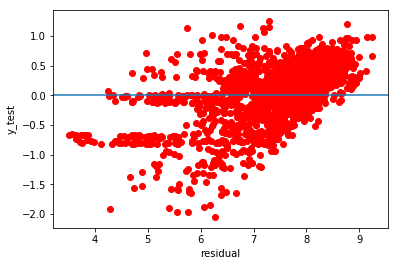

In [214]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)


### Regularization:
#### A. Lasso Regression

In [215]:
#Importing LASSO AND RIDGE from sklearn library:
#Apply Lasso Regularization Technique
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls.fit(x_train, y_train)

Lasso(alpha=0.009, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [216]:
#prediction by LASSO model
ls_pred = ls.predict(x_test)

In [217]:
#Accuracy After Lasso(by R2_score)
r2_score(y_test,ls_pred)

0.7493705993351929

In [218]:
#Root Mean Square Error
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

0.5279059293446038

#### Result after Lasso Regression
#### 1. R2_Score = 74.93%
#### 2. RMSE = 0.527

In [219]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =x.columns) 

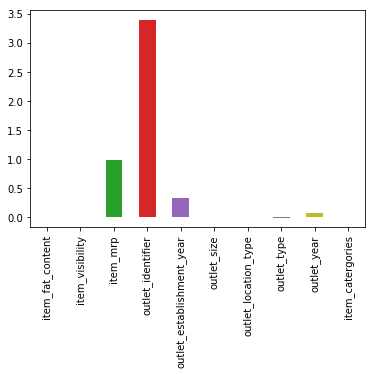

In [220]:
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [221]:
#RESHAPING THE PREDICTED VALUES
ls_pred= ls_pred.reshape(-1,1)

ls_pred

array([[7.92508596],
       [7.43980376],
       [6.45882569],
       ...,
       [7.94852716],
       [7.06608236],
       [6.65880503]])

In [222]:
#RESIDUE VALUE AFTER LASSO REGRESSION
residue = y_test - ls_pred

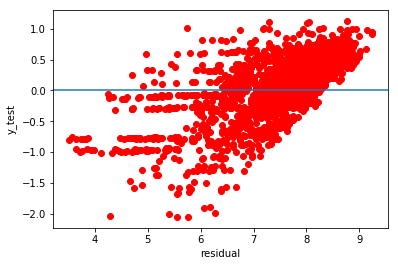

In [223]:
plt.scatter(y_test.reshape(-1,1),residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

### 3. Ridge Regression

In [224]:
#Ridge Regression
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [225]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(x_test)

In [226]:
#Accuracy score check
r2_score(y_test, y_pred)

0.765902720148384

In [227]:
#RMSE
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5101999418939085

#### Result after Ridge Regression
#### 1. R2_Score = 76.59%
#### 2. RMSE = 0.510

In [228]:
#residue after ridge
residue_rr = y_test-rr_pred

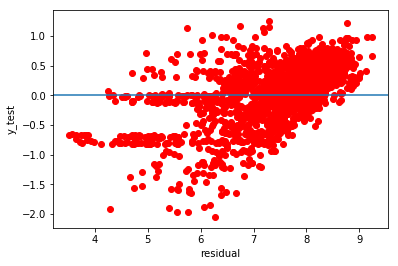

In [229]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue_rr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# decision tree

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [112]:
DST = DecisionTreeRegressor()
DST.fit(x_train,y_train)
DST_pred = DST.predict(x_test)
#Accuracy score check
r2_score(y_test, DST_pred)

0.4642330736320016

In [113]:
#RMSE
rmse_DST = sqrt(mean_squared_error(y_test, DST_pred))
rmse_DST

0.7511643246267932

#### Result after decision tree
* 1. R2_Score = 46.42%
* 2. RMSE = 0.75
* R2越大（接近于1），所拟合的回归方程越优，如果变量之间有相关性，r^2也会很高，但是没有用，反而变量相互独立是比较有效，

# Random forest

In [114]:
RFC = RandomForestRegressor(n_estimators=100,bootstrap='true',random_state=0,max_depth=4)
RFC.fit(x_train,y_train)
# predict
RFC_pred = RFC.predict(x_test)
#Accuracy score check
r2_score(y_test, RFC_pred)

0.7443070991275982

In [115]:
#RMSE
rmse_RFC = sqrt(mean_squared_error(y_test, DST_pred))
rmse_RFC

0.7511643246267932

#### Result after random forest
* 1. R2_Score = 74.43%
* 2. RMSE = 0.75